**features**


*   3,5,7,9,11,13, 15, 17, 19 harmonics [har folder]
*   coiflet 17 features [csv_files fold]
*   maximum active power  [features fold]
*   minimum active power [features fold]
*   power factor [features]
*   voltage rms value [features]
*   current rms value  [features]



In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/'My Drive'/'Colab Notebooks'/data/avrio

/content/gdrive/My Drive/Colab Notebooks/data/avrio


In [ ]:
import numpy as np
import pandas as pd
import pywt
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.signal import freqz
from sklearn.preprocessing import normalize 
%matplotlib inline
from scipy import signal
from scipy.signal import decimate
from pywt import  wavedec
from scipy.fft import fftshift
from scipy.fft import fft
import os

In [ ]:
a = os.listdir()
a

['v_rms.csv',
 'harmonic_features.csv',
 'i_rms.csv',
 'max_power.csv',
 'all_coif2_7_labelled.csv',
 'power_factor.csv',
 'min_power.csv']

## **preprocessing**

In [ ]:
df0 = pd.read_csv(a[0])
df0.head()

,filename,v_rms
0,Fan_Cyclone3000_r4_MK2_20151102051929.csv,204.791927
1,Fan_Cyclone3000_r4_MK2_20151102051942.csv,204.820971
2,Fan_Cyclone3000_r4_MK2_20151102051951.csv,205.330804
3,Fan_Cyclone3000_r4_MK2_20151102052001.csv,204.802931
4,Fan_Cyclone3000_r4_MK2_20151102052012.csv,204.551234


In [ ]:
df1 = pd.read_csv(a[1])
df1.head()

,label,3_har,5_har,7_har,9_har,11_har,13_har,15_har,17_har,19_har,21_har,23_har,25_har,27_har,29_har,31_har,33_har,35_har,37_har,39_har,41_har,43_har,45_har,47_har,49_har
0,Fan,0.023331,0.017029,0.001326,0.002706,0.001070,0.000483,0.000382,0.000286,0.000227,0.000171,0.000145,0.000132,0.000123,0.000101,0.000099,0.000084,0.000090,0.000074,0.000083,0.000060,0.000065,0.000061,0.000056,0.000052
1,Fan,0.017799,0.008058,0.001346,0.000844,0.001015,0.000425,0.000588,0.000238,0.000295,0.000168,0.000217,0.000166,0.000130,0.000108,0.000101,0.000094,0.000089,0.000084,0.000078,0.000064,0.000069,0.000063,0.000059,0.000067
2,Fan,0.006896,0.005013,0.000347,0.001234,0.000414,0.000353,0.000367,0.000265,0.000174,0.000159,0.000123,0.000131,0.000099,0.000089,0.000083,0.000071,0.000073,0.000067,0.000059,0.000066,0.000047,0.000050,0.000049,0.000045
3,Fan,0.008346,0.002116,0.000966,0.001707,0.001421,0.000272,0.000306,0.000234,0.000232,0.000155,0.000153,0.000154,0.000109,0.000102,0.000078,0.000059,0.000066,0.000060,0.000054,0.000051,0.000044,0.000041,0.000045,0.000041
4,Fan,0.011693,0.003311,0.000870,0.001272,0.001291,0.000419,0.000343,0.000162,0.000184,0.000165,0.000107,0.000096,0.000121,0.000080,0.000064,0.000066,0.000075,0.000056,0.000043,0.000058,0.000047,0.000036,0.000042,0.000044


In [ ]:
df2 = pd.read_csv(a[2])
df2.head()

,filename,i_rms
0,Fan_Cyclone3000_r4_MK2_20151102051929.csv,1.871610
1,Fan_Cyclone3000_r4_MK2_20151102051942.csv,1.637165
2,Fan_Cyclone3000_r4_MK2_20151102051951.csv,1.648813
3,Fan_Cyclone3000_r4_MK2_20151102052001.csv,1.650404
4,Fan_Cyclone3000_r4_MK2_20151102052012.csv,1.692684


In [ ]:
df3 = pd.read_csv(a[3])
df3.head()

,filename,max_power
0,WaterHeater_StiebelEltronSN10S_r1_MK1_20160126...,1935.744269
1,Laptop_Schenker-W503_r1_MK1_20160126161033.csv,83.850171
2,Laptop_Schenker-W503_r1_MK1_20160126161054.csv,82.943542
3,Laptop_Schenker-W503_r1_MK1_20160126161121.csv,83.127137
4,Laptop_Schenker-W503_r1_MK1_20160126161142.csv,83.028246


In [ ]:
df4 = pd.read_csv(a[4])
df4.head()

,label,"0,1","0,2","0,3","0,4","0,5","0,6","0,7","0,8","0,9","0,10","0,11","0,12","0,13","0,14","1,1","1,2","1,3","1,4","1,5","1,6","1,7","1,8","1,9","1,10","1,11","1,12","1,13","1,14","2,1","2,2","2,3","2,4","2,5","2,6","2,7","2,8","2,9","2,10","2,11",...,"5,3","5,4","5,5","5,6","5,7","5,8","5,9","5,10","5,11","5,12","5,13","5,14","6,1","6,2","6,3","6,4","6,5","6,6","6,7","6,8","6,9","6,10","6,11","6,12","6,13","6,14","7,1","7,2","7,3","7,4","7,5","7,6","7,7","7,8","7,9","7,10","7,11","7,12","7,13","7,14"
0,Fan_Cyclone3000_r4_MK2_20151102051929.csv,-17.307276,12.425824,-2.066512,-1.173022,-0.572505,-0.163204,0.774277,1.383390,-2.216174,-0.758174,1.981025,0.358803,-0.817273,-0.402471,-43.674182,-22.614261,-15.592891,5.451029,-7.519587,8.272319,-0.226929,9.598988,-6.206041,8.517298,-5.666873,-2.116232,0.541791,1.816243,-42.779983,-20.937885,-9.705260,14.816165,1.262866,-0.303951,1.809701,4.557476,-12.985569,-7.697543,4.204487,...,18.491528,-1.918535,-5.838430,-10.570840,-1.093453,2.965080,-3.849068,1.245051,2.715543,4.425853,-1.971128,-7.329719,-148.345039,40.898106,20.497793,-4.561070,-10.484152,-1.747373,-0.064685,-3.032060,8.036460,10.336002,4.066221,1.933434,-6.421969,-11.824464,-92.234198,19.299180,6.553223,4.075681,1.276298,-1.446441,-4.643255,-6.686234,-6.573541,-4.156974,0.073804,3.759688,5.247951,3.721544
1,Fan_Cyclone3000_r4_MK2_20151102051942.csv,-13.942517,16.986055,0.160635,-6.116024,1.341991,1.884656,-0.114189,-1.163381,0.111710,1.100787,-1.560973,0.951617,1.781463,-2.915724,-33.588887,-27.811733,-14.386305,-0.593122,3.187961,1.907903,2.073609,5.361425,0.799453,3.672207,-1.970351,-6.966366,3.538575,2.385499,-40.617778,-18.075555,-13.978297,13.907001,4.564689,-1.967002,1.758176,1.140235,-6.871987,-8.772784,4.187676,...,15.724005,3.369163,-16.063316,1.385592,-4.986005,-2.107837,-2.179201,5.679459,1.752660,2.170490,-3.319463,-3.920442,-143.816558,44.995828,10.293235,3.244500,-17.243322,1.975545,-1.052552,2.319438,0.448552,14.676697,3.004140,-1.240601,-6.783255,-4.748608,-90.813006,19.302017,6.584077,4.017872,1.374164,-1.735286,-4.439455,-6.556509,-6.764448,-3.956773,0.172861,3.617642,5.101208,3.848679
2,Fan_Cyclone3000_r4_MK2_20151102051951.csv,-16.615458,11.517269,-3.334848,2.820421,-3.090004,-1.182308,3.788207,-0.450359,-0.896186,-1.032655,0.074169,2.502380,1.170511,-4.495555,-34.008285,-28.040871,-15.176749,-0.342281,2.888443,3.572747,2.225189,1.286794,5.865099,0.649260,1.130613,-10.439737,2.283344,7.670113,-41.610817,-18.468035,-14.754615,11.022530,10.652982,-4.901523,2.481983,-0.609270,-5.135995,-9.283733,2.817285,...,16.333669,-5.372078,2.069832,-13.108830,-3.461962,3.491321,-7.369757,9.007126,2.111371,-3.256127,4.242150,-8.983606,-155.528001,46.461434,18.229451,-6.124871,-5.925072,-9.289061,8.709727,-5.925247,1.486077,15.781685,8.743140,-4.309536,-12.819176,0.670538,-96.516070,20.165895,6.530921,4.366928,1.874537,-1.264240,-4.601370,-7.380104,-6.765051,-4.795895,-0.142217,4.513976,5.589680,4.133777
3,Fan_Cyclone3000_r4_MK2_20151102052001.csv,-14.901009,11.829469,-2.387713,-2.285974,1.407089,-1.045960,0.842273,0.620345,-1.633252,-0.748041,2.787932,-0.966331,-2.020034,2.368544,-38.166810,-29.320360,-17.281130,-2.530257,7.680359,0.890663,1.793597,-2.569239,9.219761,3.404513,-11.212679,4.059596,-1.644348,1.728998,-50.768401,-27.146654,-6.819432,9.814301,12.170227,-1.273131,-0.966727,2.760106,-11.195634,-11.650892,2.209793,...,17.681337,-0.986858,-5.401551,-5.202345,-9.189033,0.365711,5.176042,1.020652,-0.191831,0.200366,-1.543488,0.470902,-145.532675,34.959908,15.845293,-4.941190,-5.908722,-0.115163,-6.648395,1.326402,7.293542,11.096184,4.358365,-2.062385,-5.042809,-8.033187,-104.450262,20.071514,5.817534,4.178104,0.773622,-1.695457,-4.425433,-6.174227,-6.267368,-4.195333,0.875528,2.831728,5.129934,3.443231
4,Fan_Cyclone3000_r4_MK2_20151102052012.csv,-10.957738,11.224407,-3.723723,0.598672,-0.611849,-1.948979,4.007658,-1.467236,-3.409793,4.410814,-1.756222,-1.280287,3.259351,-2.932321,-36.804014,-31.497293,-17.264

In [ ]:
df5 = pd.read_csv(a[5])
df5.head()

,filename,power_factor
0,WaterHeater_StiebelEltronSN10S_r1_MK1_20160126...,0.070
1,Laptop_Schenker-W503_r1_MK1_20160126161033.csv,0.636
2,Laptop_Schenker-W503_r1_MK1_20160126161054.csv,0.637
3,Laptop_Schenker-W503_r1_MK1_20160126161121.csv,0.634
4,Laptop_Schenker-W503_r1_MK1_20160126161142.csv,0.634


In [ ]:
df6 = pd.read_csv(a[6])
df6.head()

,filename,min_power
0,WaterHeater_StiebelEltronSN10S_r1_MK1_20160126...,1.275098
1,Laptop_Schenker-W503_r1_MK1_20160126161033.csv,13.332800
2,Laptop_Schenker-W503_r1_MK1_20160126161054.csv,7.257608
3,Laptop_Schenker-W503_r1_MK1_20160126161121.csv,7.405846
4,Laptop_Schenker-W503_r1_MK1_20160126161142.csv,7.664086


In [ ]:
df = pd.concat( [df1['label']   ,   df4['0,2']                #, df0['1,1'] , df0['1,2'] , df0['2,1']
                                     # ,df0['0,1'],  df0['2,2'] 
                 ,df1['3_har'] , df1['5_har'] , 
                 df1['7_har'] ,df1['9_har'] , df1['11_har'], df1['13_har'],  
                 df0['v_rms'] , df2['i_rms']  ] , axis=1)

In [ ]:
df.head(2)

,label,"0,2",3_har,5_har,7_har,9_har,11_har,13_har,v_rms,i_rms
0,Fan,12.425824,0.023331,0.017029,0.001326,0.002706,0.001070,0.000483,204.791927,1.871610
1,Fan,16.986055,0.017799,0.008058,0.001346,0.000844,0.001015,0.000425,204.820971,1.637165


In [ ]:
 x = df
 y = x["label"]
 X = x.drop(labels = ["label"], axis = 1)
 print( np.shape(X) , np.shape(y) )

(1339, 9) (1339,)


## **Algorithm**

In [ ]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
X = X 
y = y 
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 1 , ).fit(X_train, y_train) 

# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print (accuracy) 

# creating a confusion matrix 
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions) 


0.8686567164179104


In [ ]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
X = X
y = y 

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 18,   ).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

accuracy = dtree_model.score(X_test, y_test) 
print(accuracy)

# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 


0.8985074626865671


In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

clf = GradientBoostingClassifier( n_estimators= 1000 )
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test) 
print(accuracy)

0.8537313432835821


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import ExtraTreesClassifier 
# Building the model 

X_train, X_test, y_train, y_test = train_test_split(X, y) 
extra_tree_forest = ExtraTreesClassifier(n_estimators = 4000, 
										criterion ='entropy', max_features = 1  ).fit(X_train, y_train) 
          
extra_tree_forest_predictions = extra_tree_forest.predict(X_test) 

accuracy = extra_tree_forest.score(X_test, y_test) 
print(accuracy)



0.9731343283582089


In [ ]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


kfold = StratifiedKFold(n_splits=2)

# Modeling step Test differents algorithms 
import seaborn as sns
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores") 
print(cv_res)

   CrossValMeans  CrossValerrors                   Algorithm
0       0.205179        0.003984                         SVC
1       0.761952        0.002988                DecisionTree
2       0.771912        0.000996                    AdaBoost
3       0.907371        0.002988                RandomForest
4       0.932271        0.005976                  ExtraTrees
5       0.720120        0.008964            GradientBoosting
6       0.390438        0.009960     MultipleLayerPerceptron
7       0.418327        0.025896                 KNeighboors
8       0.316733        0.025896          LogisticRegression
9       0.491036        0.028884  LinearDiscriminantAnalysis


## **Merging**

In [ ]:
a = os.listdir()
a

['v_rms.csv',
 'harmonic_features.csv',
 'i_rms.csv',
 'max_power.csv',
 'all_coif2_7_labelled.csv',
 'power_factor.csv',
 'min_power.csv']

In [ ]:
d1 = pd.read_csv('v_rms.csv')
d1.head()

,filename,v_rms
0,Fan_Cyclone3000_r4_MK2_20151102051929.csv,204.791927
1,Fan_Cyclone3000_r4_MK2_20151102051942.csv,204.820971
2,Fan_Cyclone3000_r4_MK2_20151102051951.csv,205.330804
3,Fan_Cyclone3000_r4_MK2_20151102052001.csv,204.802931
4,Fan_Cyclone3000_r4_MK2_20151102052012.csv,204.551234


In [ ]:
d2 = pd.read_csv('max_power.csv')
d2.head()

,filename,max_power
0,WaterHeater_StiebelEltronSN10S_r1_MK1_20160126...,1935.744269
1,Laptop_Schenker-W503_r1_MK1_20160126161033.csv,83.850171
2,Laptop_Schenker-W503_r1_MK1_20160126161054.csv,82.943542
3,Laptop_Schenker-W503_r1_MK1_20160126161121.csv,83.127137
4,Laptop_Schenker-W503_r1_MK1_20160126161142.csv,83.028246


In [ ]:
f = [d1, d2]
pd.concat(f,axis = 1).reindex( d1['filename']).head(1)

,filename,v_rms,filename,max_power
filename,,,,
Fan_Cyclone3000_r4_MK2_20151102051929.csv,NaN,NaN,NaN,NaN


In [ ]:
f = [d1, d2]
pd.concat(f, ignore_index=False)#.head(2)

,filename,v_rms,max_power
0,Fan_Cyclone3000_r4_MK2_20151102051929.csv,204.791927,NaN
1,Fan_Cyclone3000_r4_MK2_20151102051942.csv,204.820971,NaN
2,Fan_Cyclone3000_r4_MK2_20151102051951.csv,205.330804,NaN
3,Fan_Cyclone3000_r4_MK2_20151102052001.csv,204.802931,NaN
4,Fan_Cyclone3000_r4_MK2_20151102052012.csv,204.551234,NaN
...,...,...,...
1334,WaterHeater_StiebelEltronSN10S_r1_MK1_20160126...,NaN,1921.780226
1335,WaterHeater_StiebelEltronSN10S_r1_MK1_20160126...,NaN,1932.972122
1336,WaterHeater_StiebelEltronSN10S_r1_MK1_20160126...,NaN,1923.609448
1337,WaterHeater_StiebelEltronSN10S_r1_MK1_20160126...,NaN,1951.974631


In [ ]:
pd.merge( d1 , d2)

,filename,v_rms,max_power
0,Fan_Cyclone3000_r4_MK2_20151102051929.csv,204.791927,655.882518
1,Fan_Cyclone3000_r4_MK2_20151102051942.csv,204.820971,631.207010
2,Fan_Cyclone3000_r4_MK2_20151102051951.csv,205.330804,645.807135
3,Fan_Cyclone3000_r4_MK2_20151102052001.csv,204.802931,627.207569
4,Fan_Cyclone3000_r4_MK2_20151102052012.csv,204.551234,636.328168
...,...,...,...
1334,LEDLight_FLRGB_r4_MK2_20151102050542.csv,190.469965,147.062863
1335,LEDLight_FLRGB_r4_MK2_20151102050559.csv,189.909938,186.587251
1336,LEDLight_FLRGB_r4_MK2_20151102050610.csv,188.616935,106.472982
1337,LEDLight_FLRGB_r4_MK2_20151102050621.csv,189.852598,175.338325


## **done**

In [ ]:
a = os.listdir()
a

['v_rms.csv',
 'harmonic_features.csv',
 'i_rms.csv',
 'max_power.csv',
 'all_coif2_7_labelled.csv',
 'power_factor.csv',
 'min_power.csv']

In [ ]:
df_m = pd.merge(df0, df3,)# df5,df6 )

In [ ]:
df_m2 = pd.merge(df_m, df5)

In [ ]:
df_m3 = pd.merge(df_m2, df6)

In [ ]:
df_m3 = pd.merge(df_m3, df2)

In [ ]:
df_m3.head()

,filename,v_rms,max_power,power_factor,min_power,i_rms
0,Fan_Cyclone3000_r4_MK2_20151102051929.csv,204.791927,655.882518,0.210,-0.116771,1.871610
1,Fan_Cyclone3000_r4_MK2_20151102051942.csv,204.820971,631.207010,0.197,0.013548,1.637165
2,Fan_Cyclone3000_r4_MK2_20151102051951.csv,205.330804,645.807135,0.193,0.008170,1.648813
3,Fan_Cyclone3000_r4_MK2_20151102052001.csv,204.802931,627.207569,0.191,0.004317,1.650404
4,Fan_Cyclone3000_r4_MK2_20151102052012.csv,204.551234,636.328168,0.204,-0.051664,1.692684


In [ ]:
df = pd.concat( [df1  ,  df_m3.drop( ['filename'] , axis = 1)  , df4.drop(['label'], axis=1) ] , axis = 1)
                 
                #  df4['0,2']                #, df0['1,1'] , df0['1,2'] , df0['2,1']
                #                      # ,df0['0,1'],  df0['2,2'] 
                #  ,df1['3_har'] , df1['5_har'] , 
                #  df1['7_har'] ,df1['9_har'] , df1['11_har'], df1['13_har'],  
                #  df0['v_rms'] , df2['i_rms']  ] , axis=1)

In [ ]:
df

,label,3_har,5_har,7_har,9_har,11_har,13_har,15_har,17_har,19_har,21_har,23_har,25_har,27_har,29_har,31_har,33_har,35_har,37_har,39_har,41_har,43_har,45_har,47_har,49_har,v_rms,max_power,power_factor,min_power,i_rms,"0,1","0,2","0,3","0,4","0,5","0,6","0,7","0,8","0,9","0,10",...,"5,3","5,4","5,5","5,6","5,7","5,8","5,9","5,10","5,11","5,12","5,13","5,14","6,1","6,2","6,3","6,4","6,5","6,6","6,7","6,8","6,9","6,10","6,11","6,12","6,13","6,14","7,1","7,2","7,3","7,4","7,5","7,6","7,7","7,8","7,9","7,10","7,11","7,12","7,13","7,14"
0,Fan,0.023331,0.017029,0.001326,0.002706,0.001070,0.000483,0.000382,0.000286,0.000227,0.000171,0.000145,0.000132,0.000123,0.000101,0.000099,0.000084,0.000090,0.000074,0.000083,0.000060,0.000065,0.000061,0.000056,0.000052,204.791927,655.882518,0.210,-0.116771,1.871610,-17.307276,12.425824,-2.066512,-1.173022,-0.572505,-0.163204,0.774277,1.383390,-2.216174,-0.758174,...,18.491528,-1.918535,-5.838430,-10.570840,-1.093453,2.965080,-3.849068,1.245051,2.715543,4.425853,-1.971128,-7.329719,-148.345039,40.898106,20.497793,-4.561070,-10.484152,-1.747373,-0.064685,-3.032060,8.036460,10.336002,4.066221,1.933434,-6.421969,-11.824464,-92.234198,19.299180,6.553223,4.075681,1.276298,-1.446441,-4.643255,-6.686234,-6.573541,-4.156974,0.073804,3.759688,5.247951,3.721544
1,Fan,0.017799,0.008058,0.001346,0.000844,0.001015,0.000425,0.000588,0.000238,0.000295,0.000168,0.000217,0.000166,0.000130,0.000108,0.000101,0.000094,0.000089,0.000084,0.000078,0.000064,0.000069,0.000063,0.000059,0.000067,204.820971,631.207010,0.197,0.013548,1.637165,-13.942517,16.986055,0.160635,-6.116024,1.341991,1.884656,-0.114189,-1.163381,0.111710,1.100787,...,15.724005,3.369163,-16.063316,1.385592,-4.986005,-2.107837,-2.179201,5.679459,1.752660,2.170490,-3.319463,-3.920442,-143.816558,44.995828,10.293235,3.244500,-17.243322,1.975545,-1.052552,2.319438,0.448552,14.676697,3.004140,-1.240601,-6.783255,-4.748608,-90.813006,19.302017,6.584077,4.017872,1.374164,-1.735286,-4.439455,-6.556509,-6.764448,-3.956773,0.172861,3.617642,5.101208,3.848679
2,Fan,0.006896,0.005013,0.000347,0.001234,0.000414,0.000353,0.000367,0.000265,0.000174,0.000159,0.000123,0.000131,0.000099,0.000089,0.000083,0.000071,0.000073,0.000067,0.000059,0.000066,0.000047,0.000050,0.000049,0.000045,205.330804,645.807135,0.193,0.008170,1.648813,-16.615458,11.517269,-3.334848,2.820421,-3.090004,-1.182308,3.788207,-0.450359,-0.896186,-1.032655,...,16.333669,-5.372078,2.069832,-13.108830,-3.461962,3.491321,-7.369757,9.007126,2.111371,-3.256127,4.242150,-8.983606,-155.528001,46.461434,18.229451,-6.124871,-5.925072,-9.289061,8.709727,-5.925247,1.486077,15.781685,8.743140,-4.309536,-12.819176,0.670538,-96.516070,20.165895,6.530921,4.366928,1.874537,-1.264240,-4.601370,-7.380104,-6.765051,-4.795895,-0.142217,4.513976,5.589680,4.133777
3,Fan,0.008346,0.002116,0.000966,0.001707,0.001421,0.000272,0.000306,0.000234,0.000232,0.000155,0.000153,0.000154,0.000109,0.000102,0.000078,0.000059,0.000066,0.000060,0.000054,0.000051,0.000044,0.000041,0.000045,0.000041,204.802931,627.207569,0.191,0.004317,1.650404,-14.901009,11.829469,-2.387713,-2.285974,1.407089,-1.045960,0.842273,0.620345,-1.633252,-0.748041,...,17.681337,-0.986858,-5.401551,-5.202345,-9.189033,0.365711,5.176042,1.020652,-0.191831,0.200366,-1.543488,0.470902,-145.532675,34.959908,15.845293,-4.941190,-5.908722,-0.115163,-6.648395,1.326402,7.293542,11.096184,4.358365,-2.062385,-5.042809,-8.033187,-104.450262,20.071514,5.817534,4.178104,0.773622,-1.695457,-4.425433,-6.174227,-6.267368,-4.195333,0.875528,2.831728,5.129934,3.443231
4,Fan,0.011693,0.003311,0.000870,0.001272,0.001291,0.000419,0.000343,0.000162,0.000184,0.000165,0.000107,0.000096,0.000121,0.000080,0.000064,0.000066,0.000075,0.000056,0.000043,0.000058,0.000047,0.000036,0.000042,0.000044,204.551234,636.328168,0.204,-0.051664,1.692684,-10.957738,11.224407,-3.723723,0.598672,-0.611849,-1.948979,4.007658,-1.467236,-3.409793,4.410814,...,14.470587,-3.339071,2.723825,-13.168508,-4.750325,3.3

In [ ]:
df.to_csv('all_merged.csv' , index = False)

In [ ]:
 x = df[['label' , '3_har' , '5_har' , '7_har' ,'9_har', 'v_rms' , 
         'max_power' , 'min_power' , 'power_factor', 'i_rms' , '0,1', ]]
         #'0,2' ,'1,1',  '1,2' , '2,1' ,'3,1']]
 y = x["label"]
 X = x.drop(labels = ["label"], axis = 1)
 print( np.shape(X) , np.shape(y) )

(1339, 10) (1339,)


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import ExtraTreesClassifier 
# Building the model 

X_train, X_test, y_train, y_test = train_test_split(X, y) 
extra_tree_forest = ExtraTreesClassifier(n_estimators = 4000, 
										criterion ='entropy', max_features = 1  ).fit(X_train, y_train) 
          
extra_tree_forest_predictions = extra_tree_forest.predict(X_test) 

accuracy = extra_tree_forest.score(X_test, y_test) 
print(accuracy * 100)



99.1044776119403


   CrossValMeans  CrossValerrors                   Algorithm
0       0.206175        0.006972                         SVC
1       0.833665        0.008964                DecisionTree
2       0.830677        0.003984                    AdaBoost
3       0.955179        0.018924                RandomForest
4       0.977092        0.012948                  ExtraTrees
5       0.801793        0.012948            GradientBoosting
6       0.301793        0.006972     MultipleLayerPerceptron
7       0.530876        0.000996                 KNeighboors
8       0.189243        0.011952          LogisticRegression
9       0.452191        0.007968  LinearDiscriminantAnalysis


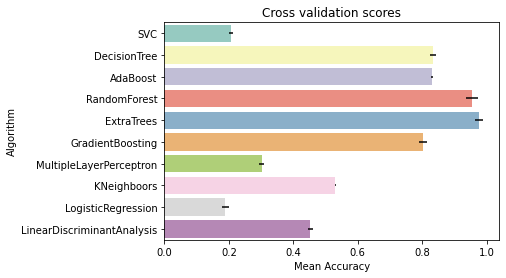

In [ ]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


kfold = StratifiedKFold(n_splits=2)

# Modeling step Test differents algorithms 
import seaborn as sns
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores") 
print(cv_res)